# Reading and merging data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data from 09/2020 to 12/2020 for high volume fhv

fhvhv_0920_feather = pd.read_feather('/Volumes/E/data/feather/fhvhv_tripdata_2020-09.feather')
fhvhv_1020_feather = pd.read_feather('/Volumes/E/data/feather/fhvhv_tripdata_2020-10.feather')
fhvhv_1120_feather = pd.read_feather('/Volumes/E/data/feather/fhvhv_tripdata_2020-11.feather')
fhvhv_1220_feather = pd.read_feather('/Volumes/E/data/feather/fhvhv_tripdata_2020-12.feather')


In [3]:
# Merge the data from Sep to Dec

frames = [fhvhv_0920_feather, fhvhv_1020_feather, fhvhv_1120_feather, fhvhv_1220_feather]
fhvhv_2020_df = pd.concat(frames, keys=["Sep", "Oct", "Nov", "Dec"])
fhvhv_2020_df.head()

hvfhs_license_num dispatching_base_num      pickup_datetime  \
Sep 0            HV0003               B02764  2020-09-01 00:14:27   
    1            HV0003               B02764  2020-09-01 00:31:36   
    2            HV0003               B02682  2020-09-01 00:19:08   
    3            HV0003               B02764  2020-09-01 00:32:09   
    4            HV0003               B02878  2020-09-01 00:06:58   

          dropoff_datetime  PULocationID  DOLocationID  SR_Flag  
Sep 0  2020-09-01 00:20:02           170           230      NaN  
    1  2020-09-01 00:52:06           163           265      NaN  
    2  2020-09-01 00:23:52           223           223      NaN  
    3  2020-09-01 01:08:58             4           265      NaN  
    4  2020-09-01 00:24:47           244           254      NaN

In [4]:
# Data that records covid cases by day in nyc

covid_df = pd.read_csv('/Volumes/E/data/cases-by-day.csv')
covid_df.head()

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,BX_CASE_COUNT,BX_PROBABLE_CASE_COUNT,BX_CASE_COUNT_7DAY_AVG,BX_ALL_CASE_COUNT_7DAY_AVG,BK_CASE_COUNT,...,MN_ALL_CASE_COUNT_7DAY_AVG,QN_CASE_COUNT,QN_PROBABLE_CASE_COUNT,QN_CASE_COUNT_7DAY_AVG,QN_ALL_CASE_COUNT_7DAY_AVG,SI_CASE_COUNT,SI_PROBABLE_CASE_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,INCOMPLETE
0,02/29/2020,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,03/04/2020,5,0,0,0,0,0,0,0,1,...,0,2,0,0,0,0,0,0,0,0


# Data cleaning and preprocessing

High Volume FHV data

In [5]:
# Impute missing values for share rides 

fhvhv_2020_df['SR_Flag'].fillna(0, inplace=True)
fhvhv_2020_df.dropna(0, inplace = True)
print("Done filling missing values")

# Check if any rows have missing values, if not, proceed
fhvhv_2020_df.isnull().sum().sort_values(ascending=False)

Done filling missing values


hvfhs_license_num       0
dispatching_base_num    0
pickup_datetime         0
dropoff_datetime        0
PULocationID            0
DOLocationID            0
SR_Flag                 0
dtype: int64

In [6]:
fhvhv_2020_df.dtypes

hvfhs_license_num        object
dispatching_base_num     object
pickup_datetime          object
dropoff_datetime         object
PULocationID              int64
DOLocationID              int64
SR_Flag                 float64
dtype: object

In [7]:
# Add a new column which comprises the duration of each trip in minutes
# Codes are modified based on:
# https://stackoverflow.com/questions/51938140/how-to-get-the-time-duration-from-two-date-time-columns-of-pandas-dataframe
# Might take up to 10 minutes to load...

covert_to_min = 60

fhvhv_2020_df['pickup_datetime'] = pd.to_datetime(fhvhv_2020_df['pickup_datetime'])
fhvhv_2020_df['dropoff_datetime'] = pd.to_datetime(fhvhv_2020_df['dropoff_datetime'])
fhvhv_2020_df['trip_duration_min'] = (fhvhv_2020_df['dropoff_datetime'] - fhvhv_2020_df['pickup_datetime']).apply(
    lambda x: x.seconds/(covert_to_min))
fhvhv_2020_df['trip_duration_min'] = fhvhv_2020_df['trip_duration_min'].round(2)

fhvhv_2020_df.head()

hvfhs_license_num dispatching_base_num     pickup_datetime  \
Sep 0            HV0003               B02764 2020-09-01 00:14:27   
    1            HV0003               B02764 2020-09-01 00:31:36   
    2            HV0003               B02682 2020-09-01 00:19:08   
    3            HV0003               B02764 2020-09-01 00:32:09   
    4            HV0003               B02878 2020-09-01 00:06:58   

         dropoff_datetime  PULocationID  DOLocationID  SR_Flag  \
Sep 0 2020-09-01 00:20:02           170           230      0.0   
    1 2020-09-01 00:52:06           163           265      0.0   
    2 2020-09-01 00:23:52           223           223      0.0   
    3 2020-09-01 01:08:58             4           265      0.0   
    4 2020-09-01 00:24:47           244           254      0.0   

       trip_duration_min  
Sep 0               5.58  
    1              20.50  
    2               4.73  
    3              36.82  
    4              17.82

In [8]:
# Remove outliers: minimum and maximum values of trip duration

outlier_min = fhvhv_2020_df['trip_duration_min'].min()
print('Minimum trip duration: ',outlier_min)
outlier_max = fhvhv_2020_df['trip_duration_min'].max()
print('Maximum trip duration: ',outlier_max)

fhvhv_2020_df = fhvhv_2020_df[(fhvhv_2020_df.trip_duration_min != outlier_min)
                              & (fhvhv_2020_df.trip_duration_min != outlier_max)]    
print('Outliers removed!')

Minimum trip duration:  0.0
Maximum trip duration:  1439.88
Outliers removed!


In [9]:
# Analysis on weekday's and hourly pickup

fhvhv_2020_df['pickup_datetime'] = pd.to_datetime(fhvhv_2020_df['pickup_datetime'])
fhvhv_2020_df['pickup_weekday'] = pd.DatetimeIndex(fhvhv_2020_df['pickup_datetime']).weekday
fhvhv_2020_df['pickup_hour'] = pd.DatetimeIndex(fhvhv_2020_df['pickup_datetime']).hour

fhvhv_2020_df.head()

hvfhs_license_num dispatching_base_num     pickup_datetime  \
Sep 0            HV0003               B02764 2020-09-01 00:14:27   
    1            HV0003               B02764 2020-09-01 00:31:36   
    2            HV0003               B02682 2020-09-01 00:19:08   
    3            HV0003               B02764 2020-09-01 00:32:09   
    4            HV0003               B02878 2020-09-01 00:06:58   

         dropoff_datetime  PULocationID  DOLocationID  SR_Flag  \
Sep 0 2020-09-01 00:20:02           170           230      0.0   
    1 2020-09-01 00:52:06           163           265      0.0   
    2 2020-09-01 00:23:52           223           223      0.0   
    3 2020-09-01 01:08:58             4           265      0.0   
    4 2020-09-01 00:24:47           244           254      0.0   

       trip_duration_min  pickup_weekday  pickup_hour  
Sep 0               5.58               1            0  
    1              20.50               1            0  
    2               4.73               1            0  
    3              36.82               1            0  
    4              17.82               1            0

COVID-19 data

In [10]:
covid_df.dtypes

date_of_interest              object
CASE_COUNT                     int64
PROBABLE_CASE_COUNT            int64
CASE_COUNT_7DAY_AVG            int64
ALL_CASE_COUNT_7DAY_AVG        int64
BX_CASE_COUNT                  int64
BX_PROBABLE_CASE_COUNT         int64
BX_CASE_COUNT_7DAY_AVG         int64
BX_ALL_CASE_COUNT_7DAY_AVG     int64
BK_CASE_COUNT                  int64
BK_PROBABLE_CASE_COUNT         int64
BK_CASE_COUNT_7DAY_AVG         int64
BK_ALL_CASE_COUNT_7DAY_AVG     int64
MN_CASE_COUNT                  int64
MN_PROBABLE_CASE_COUNT         int64
MN_CASE_COUNT_7DAY_AVG         int64
MN_ALL_CASE_COUNT_7DAY_AVG     int64
QN_CASE_COUNT                  int64
QN_PROBABLE_CASE_COUNT         int64
QN_CASE_COUNT_7DAY_AVG         int64
QN_ALL_CASE_COUNT_7DAY_AVG     int64
SI_CASE_COUNT                  int64
SI_PROBABLE_CASE_COUNT         int64
SI_CASE_COUNT_7DAY_AVG         int64
SI_ALL_CASE_COUNT_7DAY_AVG     int64
INCOMPLETE                     int64
dtype: object

In [11]:
covid_df['date_of_interest'] = pd.to_datetime(covid_df['date_of_interest'])

# Descriptive Statistics

High Volume FHV data

In [12]:
fhvhv_2020_df.shape

(48556503, 10)

In [13]:
pd.options.display.float_format = '{:,.2f}'.format
fhvhv_2020_df.describe()

,PULocationID,DOLocationID,SR_Flag,trip_duration_min,pickup_weekday,pickup_hour
count,"48,556,503.00","48,556,503.00","48,556,503.00","48,556,503.00","48,556,503.00","48,556,503.00"
mean,135.50,139.01,0.00,17.41,3.13,13.61
std,76.77,78.65,0.01,20.64,1.95,6.18
min,1.00,1.00,0.00,0.02,0.00,0.00
25%,70.00,72.00,0.00,9.32,1.00,9.00
50%,137.00,140.00,0.00,14.35,3.00,14.00
75%,210.00,215.00,0.00,21.87,5.00,19.00
max,265.00,265.00,1.00,"1,439.82",6.00,23.00


In [14]:
# Count the number of trips according to HVFHS business
# HV0002: Juno
# HV0003: Uber
# HV0004: Via
# HV0005: Lyft

print("Number of trips according to HVFHS business from 09/2020 to 12/2020:")
fhvhv_2020_df['hvfhs_license_num'].value_counts()

Number of trips according to HVFHS business from 09/2020 to 12/2020:


HV0003    35456920
HV0005    12551974
HV0004      547609
Name: hvfhs_license_num, dtype: int64

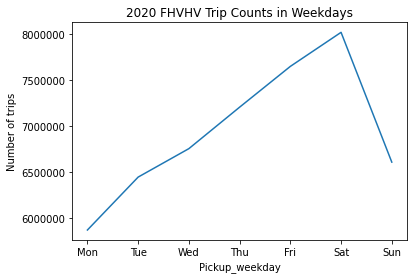

In [16]:
# Analyse the number of pick-ups in days 
# As can be seen the peak use of high volume fhv is on Saturday 

import matplotlib.pyplot as plt

weekday_trip = fhvhv_2020_df.groupby(['pickup_weekday'])['pickup_weekday'].agg(['count'])
weekday_trip = weekday_trip.reset_index()
weekday_trip['pickup_weekday'].replace({0: "Mon", 1: "Tue", 2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}, inplace=True)

plt.ticklabel_format(style='plain', axis='y')
plt.plot(weekday_trip['pickup_weekday'],weekday_trip['count'])
plt.title("2020 FHVHV Trip Counts in Weekdays")
plt.ylabel('Number of trips')
plt.xlabel('Pickup_weekday')
plt.show()


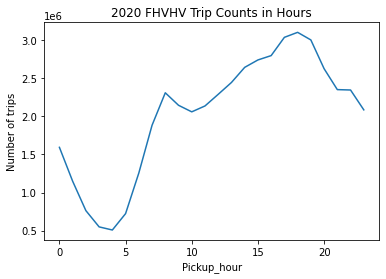

In [17]:
# Analyse the number of pick-ups in hours 
# As can be seen the peak hour is around 5-7pm 

hour_trip = fhvhv_2020_df.groupby(['pickup_hour'])['pickup_hour'].agg(['count'])
hour_trip = hour_trip.reset_index()

plt.plot(hour_trip['pickup_hour'],hour_trip['count'])
plt.title("2020 FHVHV Trip Counts in Hours")
plt.ylabel('Number of trips')
plt.xlabel('Pickup_hour')
plt.show()


COVID-19 data

In [15]:
covid_df.describe()

,CASE_COUNT,PROBABLE_CASE_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,BX_CASE_COUNT,BX_PROBABLE_CASE_COUNT,BX_CASE_COUNT_7DAY_AVG,BX_ALL_CASE_COUNT_7DAY_AVG,BK_CASE_COUNT,BK_PROBABLE_CASE_COUNT,...,MN_ALL_CASE_COUNT_7DAY_AVG,QN_CASE_COUNT,QN_PROBABLE_CASE_COUNT,QN_CASE_COUNT_7DAY_AVG,QN_ALL_CASE_COUNT_7DAY_AVG,SI_CASE_COUNT,SI_PROBABLE_CASE_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,INCOMPLETE
count,523.00,523.00,523.00,523.00,523.00,523.00,523.00,523.00,523.00,523.00,...,523.00,523.00,523.00,523.00,523.00,523.00,523.00,523.00,523.00,523.00
mean,"1,550.07",336.60,"1,543.28","1,877.24",296.41,64.01,295.50,359.04,459.65,97.82,...,271.35,450.94,94.83,449.32,543.48,124.75,24.87,124.04,148.79,147.23
std,"1,574.95",402.44,"1,489.57","1,801.22",330.70,78.57,309.03,363.30,448.24,115.22,...,249.23,477.07,116.61,454.44,542.19,133.02,30.19,124.97,148.69,"1,265.26"
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,314.00,23.00,319.50,345.50,56.00,5.00,56.00,64.00,96.00,7.00,...,57.00,83.00,6.00,83.00,92.00,22.00,1.00,21.00,23.00,0.00
50%,764.00,107.00,796.00,924.00,128.00,21.00,135.00,173.00,251.00,35.00,...,140.00,199.00,28.00,206.00,239.00,58.00,7.00,56.00,68.00,0.00
75%,"2,771.00",626.50,"2,851.50","3,667.00",496.50,116.00,493.50,644.50,817.00,182.50,...,529.50,802.00,185.50,824.50,"1,071.00",217.50,49.00,219.00,274.50,0.00
max,"6,580.00","1,422.00","5,290.00","6,437.00","1,514.00",285.00,"1,265.00","1,302.00","1,892.00",437.00,...,907.00,"1,948.00",414.00,"1,665.00","1,928.00",730.00,143.00,505.00,603.00,"11,000.00"


# Data aggregation

In [18]:
# Prepare to aggregate fhvhv taxi data and covid data
# Takes about 5 min to load

# Keep attributes we are interested in
fhvhv_by_day_df = fhvhv_2020_df[['pickup_datetime','SR_Flag','trip_duration_min']]

# To match the datetime template in covid data
fhvhv_by_day_df['pickup_date'] = fhvhv_2020_df['pickup_datetime'].dt.strftime('%Y-%m-%d')

fhvhv_by_day_df.head()

pickup_datetime  SR_Flag  trip_duration_min pickup_date
Sep 0 2020-09-01 00:14:27     0.00               5.58  2020-09-01
    1 2020-09-01 00:31:36     0.00              20.50  2020-09-01
    2 2020-09-01 00:19:08     0.00               4.73  2020-09-01
    3 2020-09-01 00:32:09     0.00              36.82  2020-09-01
    4 2020-09-01 00:06:58     0.00              17.82  2020-09-01

In [19]:
# Aggregating all attributes based on date
# Codes are modified based on:
# https://stackoverflow.com/questions/45752601/how-to-do-a-conditional-count-after-groupby-on-a-pandas-dataframe

is_SR = 1.0

reduced_df = fhvhv_by_day_df.groupby('pickup_date')['SR_Flag'].apply(
    lambda x: (x==is_SR).sum()).reset_index(name='num_of_SR')
reduced_df['trip_count'] = fhvhv_by_day_df.groupby('pickup_date')['pickup_date'].agg('count').reset_index(
    name='trip').trip
reduced_df['avg_trip_duration'] = fhvhv_by_day_df.groupby('pickup_date')['trip_duration_min'].agg('mean').reset_index(
    name='duration').duration
reduced_df.head()

,pickup_date,num_of_SR,trip_count,avg_trip_duration
0,2020-09-01,34,344879,17.83
1,2020-09-02,42,357969,17.72
2,2020-09-03,26,391021,18.26
3,2020-09-04,6,425570,19.12
4,2020-09-05,0,434656,17.15


In [20]:
# Combine the fhvhv data with covid data

start_date = '2020-09-01'
end_date = '2020-12-31'
time_range = (covid_df['date_of_interest'] >= start_date) & (covid_df['date_of_interest'] <= end_date)
covid_df = covid_df.loc[time_range].reset_index(drop=True)

In [21]:
fhvhv_covid_df = pd.merge(reduced_df,covid_df,left_index=True,right_index=True)
fhvhv_covid_df = fhvhv_covid_df.drop(columns=['date_of_interest'])
fhvhv_covid_df

,pickup_date,num_of_SR,trip_count,avg_trip_duration,CASE_COUNT,PROBABLE_CASE_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,BX_CASE_COUNT,BX_PROBABLE_CASE_COUNT,...,MN_ALL_CASE_COUNT_7DAY_AVG,QN_CASE_COUNT,QN_PROBABLE_CASE_COUNT,QN_CASE_COUNT_7DAY_AVG,QN_ALL_CASE_COUNT_7DAY_AVG,SI_CASE_COUNT,SI_PROBABLE_CASE_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,INCOMPLETE
0,2020-09-01,34,344879,17.83,294,34,255,278,52,9,...,48,73,4,58,62,24,1,18,19,0
1,2020-09-02,42,357969,17.72,271,25,249,272,42,6,...,48,69,3,58,62,17,0,18,19,0
2,2020-09-03,26,391021,18.26,274,29,250,274,41,5,...,46,90,11,62,67,17,4,19,20,0
3,2020-09-04,6,425570,19.12,230,19,243,267,44,1,...,43,59,4,63,68,26,2,20,21,0
4,2020-09-05,0,434656,17.15,156,11,247,269,30,3,...,43,34,3,63,68,24,0,22,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2020-12-27,0,285895,15.37,2886,920,3239,4094,479,170,...,540,868,317,970,1238,312,79,319,395,0
118,2020-12-28,6,301203,16.48,5385,1196,3389,4266,1019,212,...,553,1530,390,1005,1284,562,89,338,415,0
119,2020-12-29,2,330461,16.43,5201,1003,3547,4432,991,196,...,562,1602,318,1062,1347,584,80,369,447,0
120,2020-12-30,2,358647,16.91,4975,1052,3708,4610,966,182,...,588,1492,328,1105,1400,465,92,379,457,0


In [24]:
# Save aggregated data
fhvhv_covid_df.to_csv(r'/Volumes/E/data/preprocessed_data/fhvhv_covid.csv',index=False)